#Installing and Importing

In [ ]:
pip install tabulate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#=========================================
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tabulate import tabulate
#==========================================

# Dataset Import and Manupulation

In [ ]:
df=pd.read_csv("/content/Bangladesh_Population .csv")
df.head(20)

,YEAR,BD POP,BD CR,JPN POP,JPN CR
0,1960,50396429.0,NaN,93216000,NaN
1,1961,51882769.0,2.86,94055000,0.89
2,1962,53461661.0,2.95,94933000,0.92
3,1963,55094115.0,2.96,95900000,1.01
4,1964,56774465.0,2.96,96903000,1.04
5,1965,58500159.0,2.95,97952000,1.07
6,1966,60265259.0,2.93,98851000,0.91
7,1967,62104488.0,2.96,99879000,1.03
8,1968,63995652.0,2.96,101011000,1.12
9,1969,65866908.0,2.84,102219000,1.18


In [ ]:
df.keys()

Index(['YEAR', 'BD POP', 'BD CR', 'JPN POP', 'JPN CR'], dtype='object')

In [ ]:
df.drop(df.columns[[3, 4, 5,6,7,8]], axis=1, inplace=True)
df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     63 non-null     int64  
 1   BD Pop   62 non-null     float64
 2   BD CR    61 non-null     float64
 3   JPN Pop  63 non-null     int64  
 4   JPN CR   62 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.6 KB


In [ ]:
df["BD CR"].fillna("0", inplace = True)

In [ ]:
df.head()

,Date,BD Pop,BD CR,JPN Pop,JPN CR
0,1960,50396429.0,0,93216000,NaN
1,1961,51882769.0,2.86,94055000,0.89
2,1962,53461661.0,2.95,94933000,0.92
3,1963,55094115.0,2.96,95900000,1.01
4,1964,56774465.0,2.96,96903000,1.04


# Visualization

In [ ]:
sns.barplot(x="Date(Year)", y="Population",data=df)

ValueError: ignored

<Axes: xlabel='Date(Year)', ylabel='Population'>

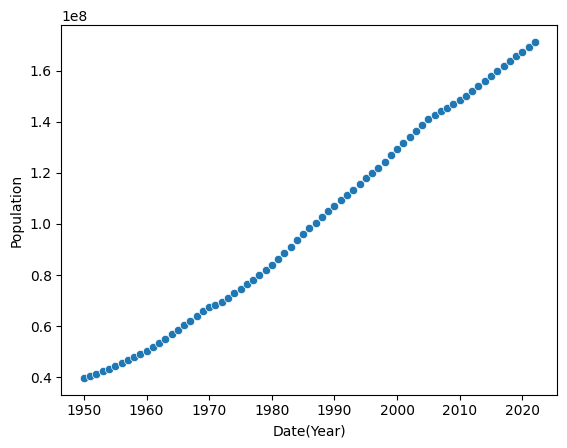

In [ ]:
sns.scatterplot(data=df,x="Date(Year)",y="Population")

# Using Models

###Exponential Model

In [ ]:
df['LogPopulation'] = np.log10(df['Population'])

In [ ]:
df.head()

,Date(Year),Population,Annual % Change,LogPopulation
0,1950,39728535,0,7.599103
1,1951,40548590,2.06,7.607976
2,1952,41426885,2.17,7.617282
3,1953,42329279,2.18,7.626641
4,1954,43282032,2.25,7.636308


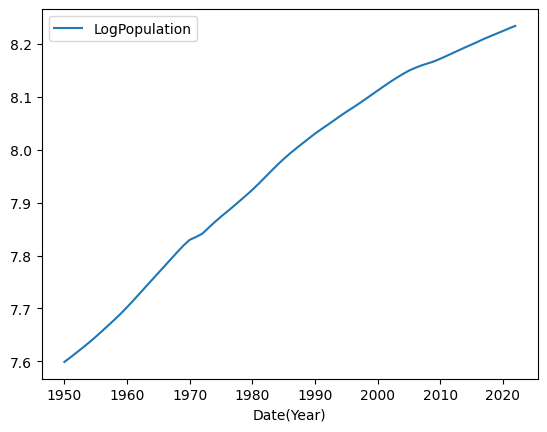

In [ ]:
fig, ax = plt.subplots()
df.plot('Date(Year)', 'LogPopulation', ax=ax)
plt.show()

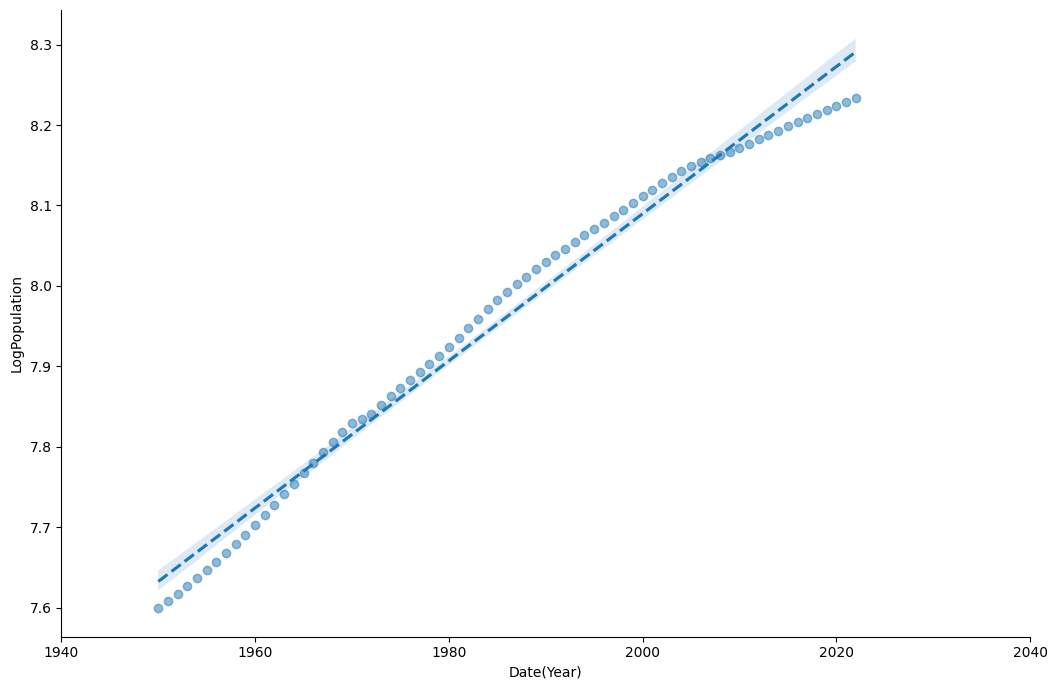

In [ ]:
sns.lmplot(
    x='Date(Year)',
    y='LogPopulation',

    data=df,
    height=7,
    aspect=1.5,
    line_kws=dict(ls='--'),
    scatter_kws=dict(alpha=0.5),
    #hue_order=G7_countries
)
plt.xlim(1940, 2040);

In [ ]:
from sklearn import linear_model

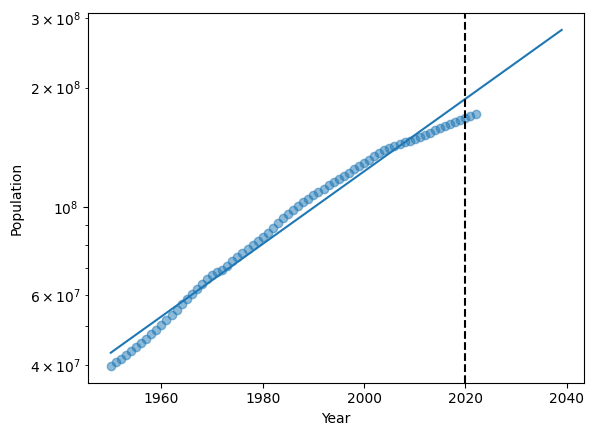

In [ ]:
pop=""
def extrapolate_plot(df, max_year=2040):
    #country_df = df[df['Country Name'] == country_name]
    x = df['Date(Year)'].values
    y = df['Population'].values
    logy = df['LogPopulation'].values
    #============================
    # print(x.min())
    # print(y)
    #print(10**logy)
    #==================================
    handles = plt.plot(x, y, 'o', alpha=0.5)

    years = np.arange(1950, 2040)
    lm = linear_model.LinearRegression()
    lm.fit(x.reshape((-1, 1)), logy)
    logpopulation = lm.predict(years.reshape(-1, 1))
    loo=logy.reshape(-1,1)
    #print(10**logpopulation)
    plt.plot(years, 10**logpopulation, label="bd", color=handles[0].get_color())
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.yscale('log')

    p=(10**logy)/10000000
    po={'Population':p}

    expd={'Year':years,'Estimation':(10**logpopulation)/10000000}

    exp=pd.DataFrame(expd)
    paaa=pd.DataFrame(po)

    pop= pd.concat((exp,paaa), axis=1)
    #print(pop)
    return pop
finalp=extrapolate_plot(df, "Bangladesh")
plt.axvline(2020, color='k', ls='--');
#plt.ayvline(2030, color='k', ls='--');

In [ ]:
finalp.head(10)

,Year,Estimation,Population
0,1950,4.288942,3.972853
1,1951,4.380231,4.054859
2,1952,4.473463,4.142689
3,1953,4.568680,4.232928
4,1954,4.665924,4.328203
5,1955,4.765237,4.431555
6,1956,4.866664,4.540767
7,1957,4.970250,4.656052
8,1958,5.076041,4.774279
9,1959,5.184084,4.900496


In [ ]:
finalp.tail(20)

,Year,Estimation,Population
70,2020,18.734042,16.742095
71,2021,19.132792,16.935625
72,2022,19.540030,17.118637
73,2023,19.955936,NaN
74,2024,20.380695,NaN
75,2025,20.814494,NaN
76,2026,21.257527,NaN
77,2027,21.709990,NaN
78,2028,22.172083,NaN
79,2029,22.644012,NaN


In [ ]:
sl=finalp[0:72]
sl

,Year,Estimation,Population
0,1950,4.288942,3.972853
1,1951,4.380231,4.054859
2,1952,4.473463,4.142689
3,1953,4.568680,4.232928
4,1954,4.665924,4.328203
...,...,...,...
67,2017,17.586963,16.179396
68,2018,17.961298,16.368396
69,2019,18.343601,16.551622
70,2020,18.734042,16.742095


In [ ]:
sllE=sl['Estimation'].values
sllA=sl['Population'].values
sllY=sl['Year'].values
print(sllA)

[ 3.9728535  4.054859   4.1426885  4.2329279  4.3282032  4.4315548
  4.5407666  4.6560522  4.7742791  4.9004963  5.0396429  5.1882769
  5.3461661  5.5094115  5.6774465  5.8500159  6.0265259  6.2104488
  6.3995652  6.5866908  6.754186   6.8376204  6.9346705  7.1144818
  7.2947807  7.4700345  7.638008   7.8137788  8.000755   8.1908151
  8.3929765  8.6154836  8.8555336  9.1045478  9.3534239  9.5959099
  9.8271746 10.0490256 10.2688833 10.4893674 10.7147651 10.9242834
 11.1272102 11.3418757 11.5614891 11.7793338 11.9876868 12.2039226
 12.4350471 12.6754824 12.9193327 13.1670484 13.4139826 13.6503206
 13.8789725 14.091259  14.2628831 14.4135934 14.5421318 14.670681
 14.8391139 15.0211005 15.2090649 15.4030139 15.5961299 15.783
 15.9784568 16.1793964 16.3683958 16.5516222 16.7420951 16.9356251]


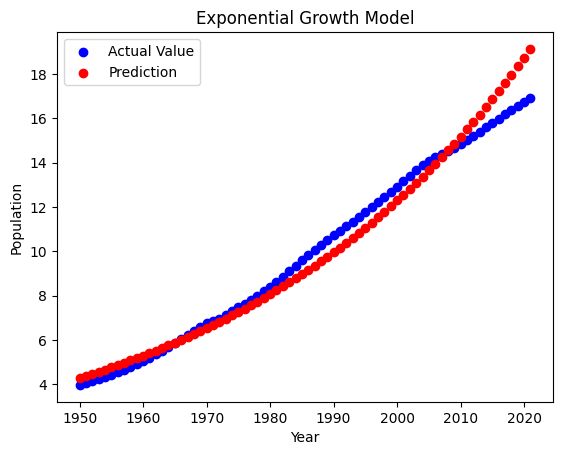

In [ ]:
plt.scatter(sllY,sllA,color='b')
plt.scatter(sllY,sllE, color='r')
plt.legend(["Actual Value" , "Prediction"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Exponential Growth Model')
plt.show()

In [ ]:
finalp.head()

,Year,Estimation,Population
0,1950,4.288942,3.972853
1,1951,4.380231,4.054859
2,1952,4.473463,4.142689
3,1953,4.568680,4.232928
4,1954,4.665924,4.328203


## Data pre-processing for ML models

In [ ]:
x=df.iloc[:, 0:1].values  #year
y=df.iloc[:, 1:2].values  #population

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
f={"Year":["2023","2024","2025","2026","2027","2028","2029","2030","2031","2032","2033"]}
predx=pd.DataFrame(f)
predx

,Year
0,2023
1,2024
2,2025
3,2026
4,2027
5,2028
6,2029
7,2030
8,2031
9,2032


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
fpe_pred=regressor.predict(predx)
fped=pd.DataFrame(fpe_pred/1000000)
fped.columns =['LR Prediction']
#print(fpe_pred)
fpe= pd.concat((predx,fped), axis=1)
fpe



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Year,LR Prediction
0,2023,171.852427
1,2024,173.778923
2,2025,175.705420
3,2026,177.631916
4,2027,179.558413
5,2028,181.484909
6,2029,183.411406
7,2030,185.337902
8,2031,187.264399
9,2032,189.190895


In [ ]:
from sklearn.metrics import r2_score
sr1=r2_score(y_test,y_pred)
sr1

0.9932852451350042

In [ ]:
from sklearn.metrics import mean_squared_error
ms1=mean_squared_error(y_test,y_pred)

In [ ]:
 from sklearn.metrics import mean_absolute_percentage_error
 mape1=mean_absolute_percentage_error(y_test, y_pred)

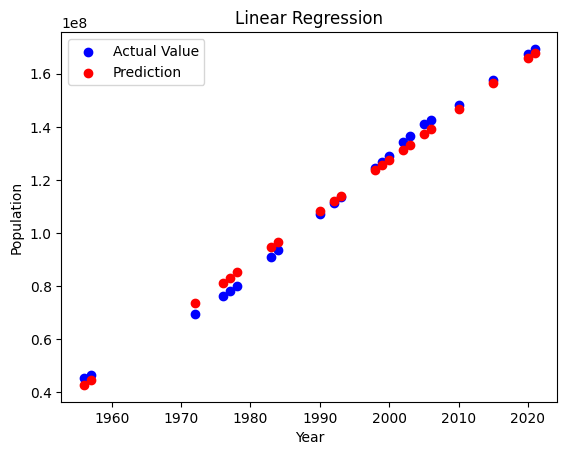

In [ ]:
plt.scatter(x_test,y_test,color='b')
plt.scatter(x_test,y_pred, color='r')
plt.legend(["Actual Value" , "Prediction"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression')
plt.show()

In [ ]:
from tabulate import tabulate
d=[]
dt={}
# assign data
for i in range(len(y_pred)):
  l=[
      x_test[i],
        y_test[i]/10000000,
        y_pred[i]/10000000
  ]
  dt[x_test[i][0]]=[y_test[i]/10000000,
        y_pred[i]/10000000]
  d.append(l)
#print(dt)
dic2={}
for i in sorted(dt):
  #print(i)
  dic2[i]=dt[i]
#print(dic2)
m=[]
final=[]
for i in dic2:
  m.append(i)
  for j in dic2[i]:
    m.append(j)
  final.append(m)
  m=[]
#print(final)
# display table
#print(tabulate(d))
print(tabulate(final,headers=["Year","Population", "Prediction"]))

  Year    Population    Prediction
------  ------------  ------------
  1956       4.54077       4.27772
  1957       4.65605       4.47037
  1972       6.93467       7.36011
  1976       7.63801       8.13071
  1977       7.81378       8.32336
  1978       8.00075       8.51601
  1983       9.10455       9.47926
  1984       9.35342       9.67191
  1990      10.7148       10.8278
  1992      11.1272       11.2131
  1993      11.3419       11.4058
  1998      12.435        12.369
  1999      12.6755       12.5617
  2000      12.9193       12.7543
  2002      13.414        13.1396
  2003      13.6503       13.3322
  2005      14.0913       13.7175
  2006      14.2629       13.9102
  2010      14.8391       14.6808
  2015      15.783        15.644
  2020      16.7421       16.6073
  2021      16.9356       16.7999


## Polynomial Regressiom

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 27)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(poly_reg.transform(x_test))

In [ ]:
poly_pred=regressor.predict(poly_reg.transform(predx))
polyDf=pd.DataFrame(poly_pred/1000000)
polyDf.columns =['Prediction']
#print(fpe_pred)
poly= pd.concat((predx,polyDf), axis=1)
poly

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


,Year,Prediction
0,2023,170.502992
1,2024,171.627828
2,2025,172.660612
3,2026,173.596586
4,2027,174.430866
5,2028,175.158437
6,2029,175.774153
7,2030,176.272730
8,2031,176.648751
9,2032,176.896654


In [ ]:
from sklearn.metrics import r2_score
sr2=r2_score(y_test,y_pred)
sr2

0.999291246729618

In [ ]:
from sklearn.metrics import mean_squared_error
ms2=mean_squared_error(y_test,y_pred)
print(ms2)

904226721087.0142


In [ ]:
 from sklearn.metrics import mean_absolute_percentage_error
 mape2=mean_absolute_percentage_error(y_test, y_pred)


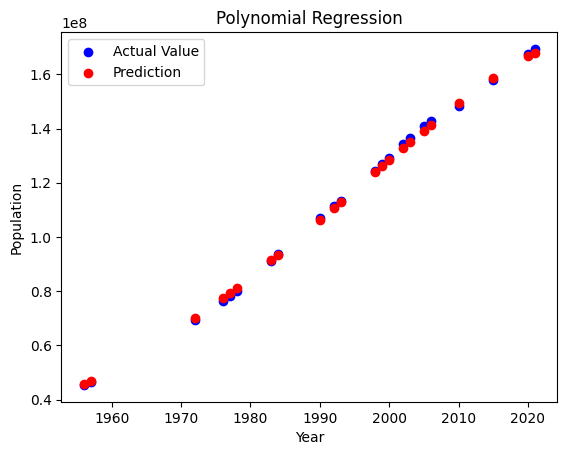

In [ ]:
plt.scatter(x_test,y_test,color='b')
plt.scatter(x_test,y_pred, color='r')
plt.legend(["Actual Value" , "Prediction"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
prc={'Year':x_test,'Population':y_test,'Prediction':y_pred}

In [ ]:
from tabulate import tabulate
d=[]
dt={}
# assign data
for i in range(len(y_pred)):
  l=[
      x_test[i],
        y_test[i]/10000000,
        y_pred[i]/10000000
  ]
  dt[x_test[i][0]]=[y_test[i]/10000000,
        y_pred[i]/10000000]
  d.append(l)
#print(dt)
dic2={}
for i in sorted(dt):
  #print(i)
  dic2[i]=dt[i]
#print(dic2)
m=[]
final=[]
for i in dic2:
  m.append(i)
  for j in dic2[i]:
    m.append(j)
  final.append(m)
  m=[]
#print(final)
# display table
#print(tabulate(d))
print(tabulate(final,headers=["Year","Population", "Prediction"]))

  Year    Population    Prediction
------  ------------  ------------
  1956       4.54077       4.57547
  1957       4.65605       4.69925
  1972       6.93467       7.00143
  1976       7.63801       7.74276
  1977       7.81378       7.93526
  1978       8.00075       8.13045
  1983       9.10455       9.14294
  1984       9.35342       9.35195
  1990      10.7148       10.6405
  1992      11.1272       11.0796
  1993      11.3419       11.3002
  1998      12.435        12.4061
  1999      12.6755       12.6265
  2000      12.9193       12.8461
  2002      13.414        13.282
  2003      13.6503       13.4979
  2005      14.0913       13.9242
  2006      14.2629       14.1341
  2010      14.8391       14.9452
  2015      15.783        15.8721
  2020      16.7421       16.6622
  2021      16.9356       16.7996


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
dtr_pred=regressor.predict(predx)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


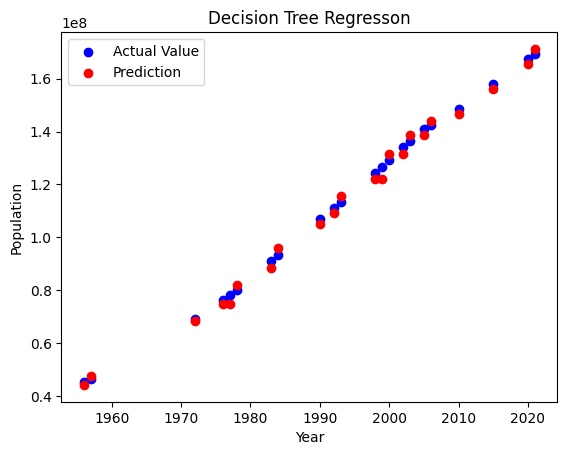

In [ ]:
plt.scatter(x_test,y_test,color='b')
plt.scatter(x_test,y_pred, color='r')
plt.legend(["Actual Value" , "Prediction"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Decision Tree Regresson')
plt.show()

In [ ]:
dtc={'Year':x_test,'Population':y_test,'Prediction':y_pred}

In [ ]:
dtrDf=pd.DataFrame(dtr_pred/1000000)
dtrDf.columns =['Prediction']
#print(fpe_pred)
dtr= pd.concat((predx,dtrDf), axis=1)
dtr

,Year,Prediction
0,2023,171.186372
1,2024,171.186372
2,2025,171.186372
3,2026,171.186372
4,2027,171.186372
5,2028,171.186372
6,2029,171.186372
7,2030,171.186372
8,2031,171.186372
9,2032,171.186372


In [ ]:
d=[]
dt={}
# assign data
for i in range(len(y_pred)):
  l=[
      x_test[i],
        y_test[i]/10000000,
        y_pred[i]/10000000
  ]
  dt[x_test[i][0]]=[y_test[i]/10000000,
        y_pred[i]/10000000]
  d.append(l)
#print(dt)
dic2={}
for i in sorted(dt):
  #print(i)
  dic2[i]=dt[i]
#print(dic2)
m=[]
final=[]
for i in dic2:
  m.append(i)
  for j in dic2[i]:
    m.append(j)
  final.append(m)
  m=[]
#print(final)
# display table
#print(tabulate(d))
print(tabulate(final,headers=["Year","Population", "Prediction"]))

  Year    Population    Prediction
------  ------------  ------------
  1956       4.54077       4.43155
  1957       4.65605       4.77428
  1972       6.93467       6.83762
  1976       7.63801       7.47003
  1977       7.81378       7.47003
  1978       8.00075       8.19082
  1983       9.10455       8.85553
  1984       9.35342       9.59591
  1990      10.7148       10.4894
  1992      11.1272       10.9243
  1993      11.3419       11.5615
  1998      12.435        12.2039
  1999      12.6755       12.2039
  2000      12.9193       13.167
  2002      13.414        13.167
  2003      13.6503       13.879
  2005      14.0913       13.879
  2006      14.2629       14.4136
  2010      14.8391       14.6707
  2015      15.783        15.5961
  2020      16.7421       16.5516
  2021      16.9356       17.1186


In [ ]:
from sklearn.metrics import r2_score
sr3=r2_score(y_test,y_pred)
sr3

0.9959736689085008

In [ ]:
from sklearn.metrics import mean_squared_error
ms3=mean_squared_error(y_test,y_pred)
print(ms3)

5136789222736.137


In [ ]:
 from sklearn.metrics import mean_absolute_percentage_error
 mape3=mean_absolute_percentage_error(y_test, y_pred)


## MLP Regressor

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train_norm = scaler.fit_transform(x_train)
# x_test_norm = scaler.fit_transform(x_test)

In [ ]:
# from sklearn.neural_network import MLPRegressor
# regressor=MLPRegressor()
# a=regressor.fit(x_train_norm,y_train)

In [ ]:
# y_pred=a.predict(x_test_norm)

In [ ]:
y_pred

array([1.22039226e+08, 1.38789725e+08, 6.83762040e+07, 1.15614891e+08,
       8.19081510e+07, 7.47003450e+07, 1.65516222e+08, 1.31670484e+08,
       9.59590990e+07, 4.77427910e+07, 1.09242834e+08, 1.38789725e+08,
       1.04893674e+08, 1.46706810e+08, 8.85553360e+07, 1.55961299e+08,
       7.47003450e+07, 1.71186372e+08, 1.44135934e+08, 1.31670484e+08,
       4.43155480e+07, 1.22039226e+08])

In [ ]:
# from sklearn.metrics import r2_score
# sr4=r2_score(y_test,y_pred)
# sr4

In [ ]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test,y_pred)

In [ ]:
# plt.scatter(x_test,y_test,color='b')
# plt.scatter(x_test,y_pred, color='r')
# plt.legend(["Actual Value" , "Prediction"])
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('MLP Regresson')
# plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

<ipython-input-62-1d4cc70c0ff1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
rf_pred=regressor.predict(predx)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
rfDf=pd.DataFrame(rf_pred/1000000)
rfDf.columns =['RF Prediction']
rf= pd.concat((predx,rfDf), axis=1)
rf

,Year,RF Prediction
0,2023,168.179633
1,2024,168.179633
2,2025,168.179633
3,2026,168.179633
4,2027,168.179633
5,2028,168.179633
6,2029,168.179633
7,2030,168.179633
8,2031,168.179633
9,2032,168.179633


In [ ]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
rfc={'Year':x_test,'Population':y_test,'Prediction':y_pred}

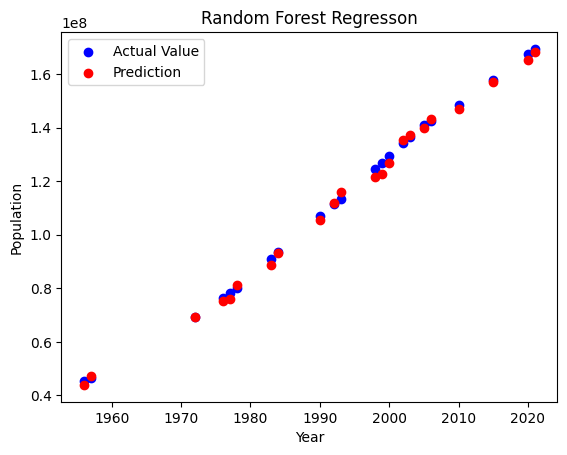

In [ ]:
plt.scatter(x_test,y_test,color='b')
plt.scatter(x_test,y_pred, color='r')
plt.legend(["Actual Value" , "Prediction"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Random Forest Regresson')
plt.show()

In [ ]:
d=[]
dt={}
# assign data
for i in range(len(y_pred)):
  l=[
      x_test[i],
        y_test[i]/10000000,
        y_pred[i]/10000000
  ]
  dt[x_test[i][0]]=[y_test[i]/10000000,
        y_pred[i]/10000000]
  d.append(l)
dic2={}
for i in sorted(dt):
  dic2[i]=dt[i]
m=[]
final=[]
for i in dic2:
  m.append(i)
  for j in dic2[i]:
    m.append(j)
  final.append(m)
  m=[]
# display table
#print(tabulate(d))
print(tabulate(final,headers=["Year","Population", "Prediction"]))

  Year    Population    Prediction
------  ------------  ------------
  1956       4.54077       4.39021
  1957       4.65605       4.70802
  1972       6.93467       6.91234
  1976       7.63801       7.52459
  1977       7.81378       7.61419
  1978       8.00075       8.13895
  1983       9.10455       8.88332
  1984       9.35342       9.32289
  1990      10.7148       10.5543
  1992      11.1272       11.1994
  1993      11.3419       11.5833
  1998      12.435        12.1607
  1999      12.6755       12.2786
  2000      12.9193       12.6639
  2002      13.414        13.523
  2003      13.6503       13.7366
  2005      14.0913       13.9859
  2006      14.2629       14.3067
  2010      14.8391       14.68
  2015      15.783        15.7108
  2020      16.7421       16.5161
  2021      16.9356       16.818


In [ ]:
from sklearn.metrics import r2_score
sr4=r2_score(y_test,y_pred)
sr4

0.9976392823485105

In [ ]:
from sklearn.metrics import mean_squared_error
ms4=mean_squared_error(y_test,y_pred)
print(ms4)

3011801243990.342


In [ ]:
 from sklearn.metrics import mean_absolute_percentage_error
 mape4=mean_absolute_percentage_error(y_test, y_pred)


# **Comparison**

In [ ]:
r2={"R-squared":[sr1,sr2,sr3,sr4]}
r2df=pd.DataFrame(r2)
r2df

,R-squared
0,0.993285
1,0.999291
2,0.995974
3,0.997639


[Text(0, 0, 'R-squared\n0.993285'),
 Text(0, 0, 'R-squared\n0.999291'),
 Text(0, 0, 'R-squared\n0.995974'),
 Text(0, 0, 'R-squared\n0.997639')]

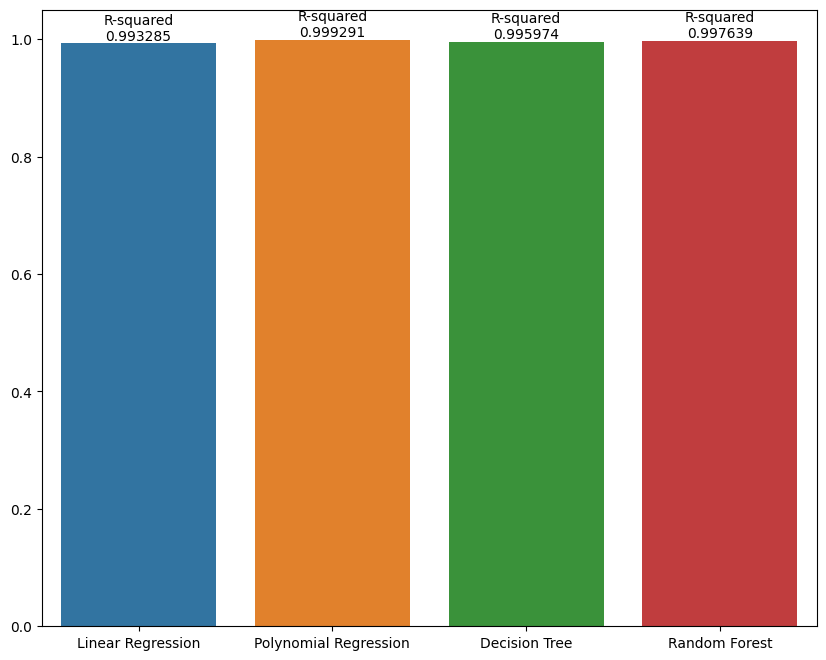

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.barplot(x=["Linear Regression","Polynomial Regression","Decision Tree", "Random Forest"],y=[sr1,sr2,sr3,sr4])
ax.bar_label(ax.containers[-1], fmt='R-squared\n%2f', label_type='edge')

In [ ]:
ms={'mean_squared_error':[ms1,ms2,ms3,ms4]}
msdf=pd.DataFrame(ms)
msdf

,mean_squared_error
0,8.566678e+12
1,9.042267e+11
2,5.136789e+12
3,3.011801e+12


[Text(0, 0, 'mean_squared_error\n8566677612938.896484'),
 Text(0, 0, 'mean_squared_error\n904226721087.014160'),
 Text(0, 0, 'mean_squared_error\n5136789222736.136719'),
 Text(0, 0, 'mean_squared_error\n3011801243990.341797')]

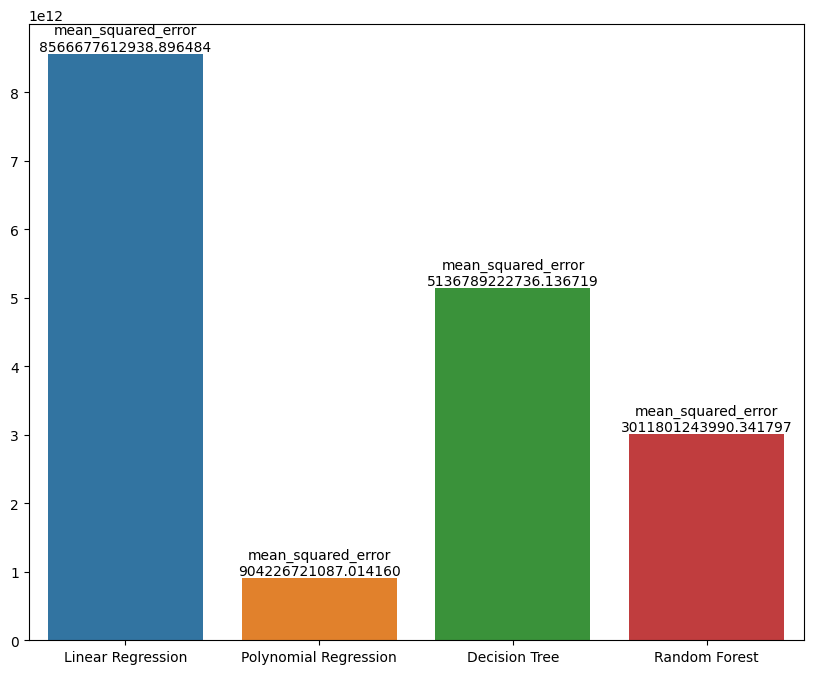

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=["Linear Regression","Polynomial Regression","Decision Tree", "Random Forest"],y=[ms1,ms2,ms3,ms4])
ax.bar_label(ax.containers[-1], fmt='mean_squared_error\n%2f', label_type='edge')


[Text(0, 0, 'MAPE\n0.027727'),
 Text(0, 0, 'MAPE\n0.007757'),
 Text(0, 0, 'MAPE\n0.020283'),
 Text(0, 0, 'MAPE\n0.014063')]

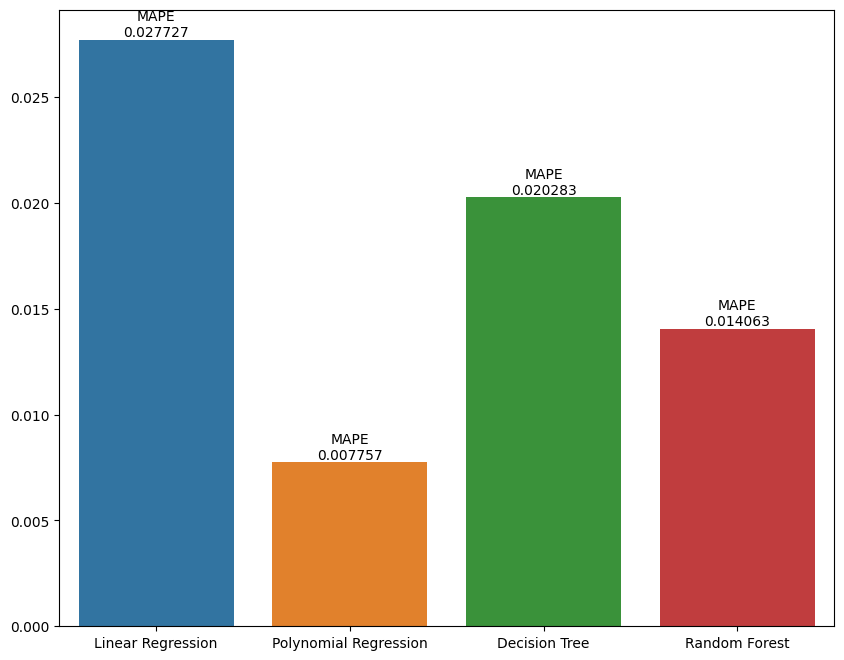

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.barplot(x=["Linear Regression","Polynomial Regression","Decision Tree", "Random Forest"],y=[mape1,mape2,mape3,mape4])
ax.bar_label(ax.containers[-1], fmt='MAPE\n%2f', label_type='edge')

# **Predicting Future Population**

In [ ]:
cdf = predx.copy(deep=True)
cdf

,Year
0,2023
1,2024
2,2025
3,2026
4,2027
5,2028
6,2029
7,2030
8,2031
9,2032


In [ ]:
lrp = fpe['LR Prediction'].values
plp=poly['Prediction'].values
dtp=dtr['Prediction'].values
rfp=rf['RF Prediction'].values
print(lrp)
print(plp)
print(dtp)
print(rfp)

[171.85242671 173.77892322 175.70541972 177.63191623 179.55841274
 181.48490924 183.41140575 185.33790225 187.26439876 189.19089527
 191.11739177]
[170.50299243 171.62782795 172.6606119  173.59658639 174.43086645
 175.15843746 175.77415259 176.27273006 176.64875053 176.89665431
 177.01073857]
[171.186372 171.186372 171.186372 171.186372 171.186372 171.186372
 171.186372 171.186372 171.186372 171.186372 171.186372]
[168.1796334 168.1796334 168.1796334 168.1796334 168.1796334 168.1796334
 168.1796334 168.1796334 168.1796334 168.1796334 168.1796334]


In [ ]:
expd=finalp[73:84]
expd

,Year,Estimation,Population
73,2023,19.955936,NaN
74,2024,20.380695,NaN
75,2025,20.814494,NaN
76,2026,21.257527,NaN
77,2027,21.709990,NaN
78,2028,22.172083,NaN
79,2029,22.644012,NaN
80,2030,23.125985,NaN
81,2031,23.618218,NaN
82,2032,24.120927,NaN


In [ ]:
exp=expd['Estimation'].values*10

In [ ]:
cdf['L R']=lrp
cdf['Poly R']=plp
cdf['DT R']=dtp
cdf['RF R']=rfp
cdf['Exp']=exp
cdf

,Year,L R,Poly R,DT R,RF R,Exp
0,2023,171.852427,170.502992,171.186372,168.179633,199.559364
1,2024,173.778923,171.627828,171.186372,168.179633,203.806949
2,2025,175.705420,172.660612,171.186372,168.179633,208.144943
3,2026,177.631916,173.596586,171.186372,168.179633,212.575270
4,2027,179.558413,174.430866,171.186372,168.179633,217.099896
5,2028,181.484909,175.158437,171.186372,168.179633,221.720828
6,2029,183.411406,175.774153,171.186372,168.179633,226.440116
7,2030,185.337902,176.272730,171.186372,168.179633,231.259853
8,2031,187.264399,176.648751,171.186372,168.179633,236.182177
9,2032,189.190895,176.896654,171.186372,168.179633,241.209272
